# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



print("IMPORT Succesfull")

IMPORT Succesfull


# read Red Wine dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ml/winequality-red.csv")
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# Delete columns with more than 60% NULL vaules

In [ ]:
# Calculate the percentage of null values for each column
null_percentages = df.isnull().sum() / len(df) * 100

# Identify columns with a null percentage greater than 60%
null_columns = null_percentages[null_percentages > 60].index

# Drop the identified columns
df.drop(null_columns, axis=1, inplace=True)

df.shape #check is there any column has been delted.

(1599, 12)

# Replace Remaining NULL values with Mean of that column, as it is a continuos data

In [ ]:
# Calculate the mean of each column
means = df.mean()

# Fill null values with the mean of that column
df.fillna(means, inplace=True)

print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# *Handled All The missing vaules*

# EDA exploratory data analysis

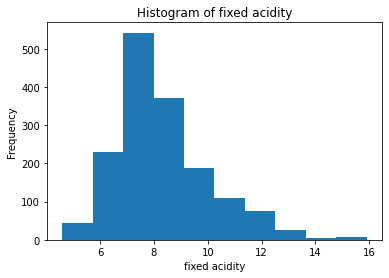

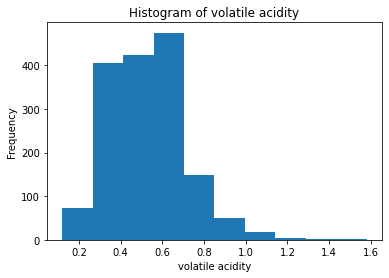

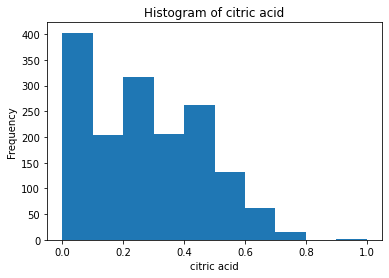

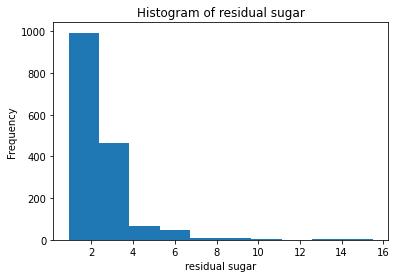

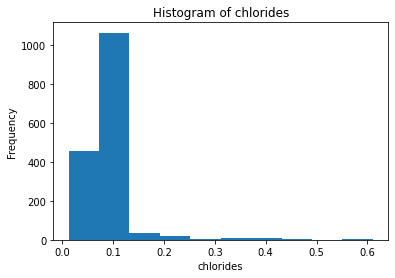

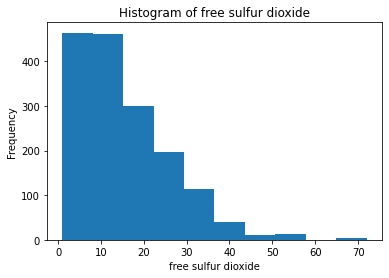

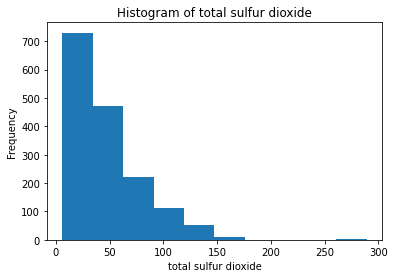

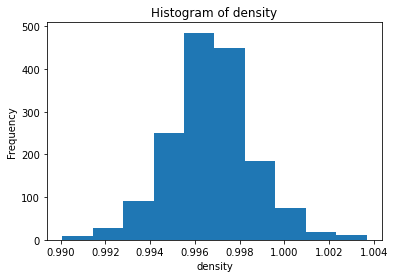

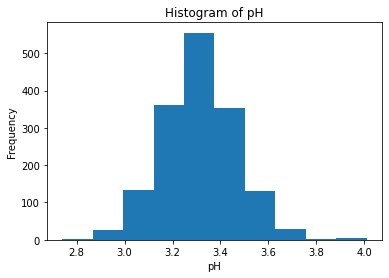

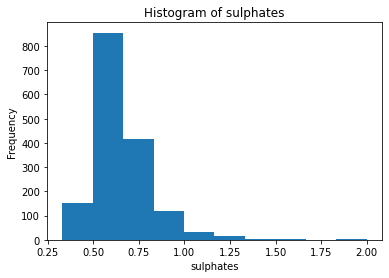

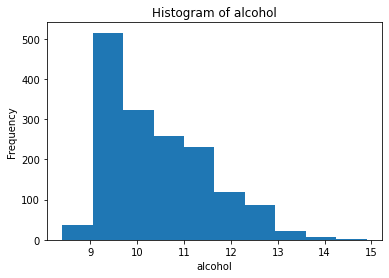

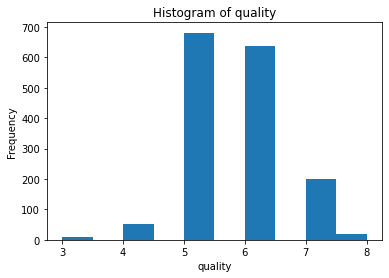

In [ ]:
#iterate over dataset for all columns
for column in df.columns:
    # Create a histogram for each column
    plt.hist(df[column])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column)

    # Show the plot
    plt.show()



# derive variance

# Pearson correlation coefficient matrix



In [ ]:
import pandas as pd
import numpy as np


# Calculate the mean of each column
means = df.mean()

# Subtract the mean from each value in the column to get the deviation from the mean
deviations = df - means

# Square the deviations from the mean
squared_deviations = deviations ** 2

# Calculate the sum of the squared deviations from the mean
sum_squared_deviations = squared_deviations.sum()

# Divide the sum of squared deviations by the number of observations in the column minus one to get the variance
variances = sum_squared_deviations / (df.count() - 1)

print(variances)


fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64


In [ ]:
import pandas as pd

# Calculate the Pearson correlation coefficient matrix
corr_matrix = df.corr()

print(corr_matrix)


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

# Features density plots (indicating Central tendency and spread) of every feature

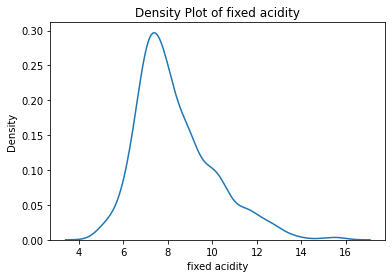

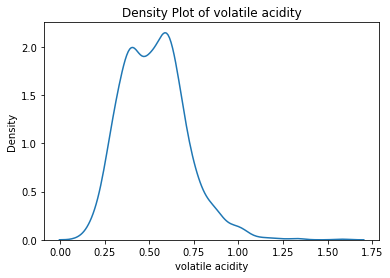

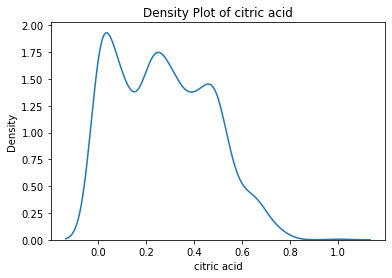

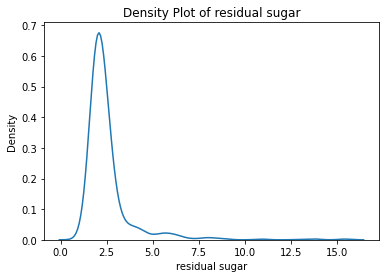

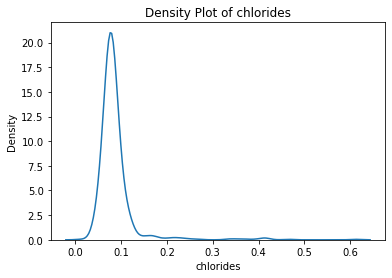

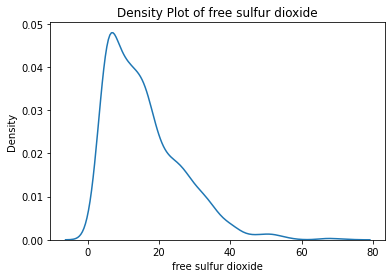

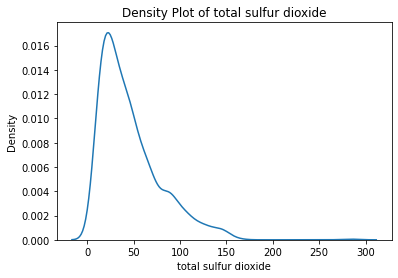

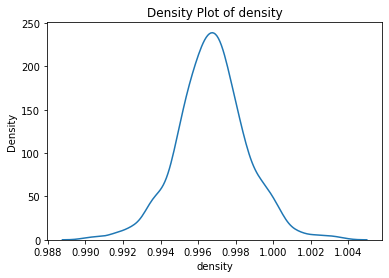

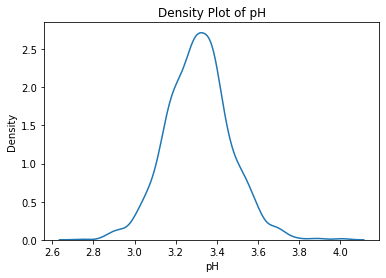

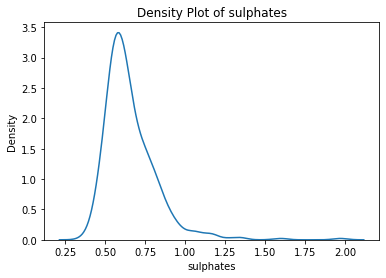

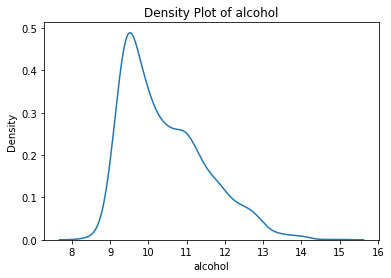

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loop through each feature in the dataset
for feature in df.columns[:-1]: # exclude the class_label column
    # Create a subplot for the current feature
    fig, ax = plt.subplots()

    # Plot the density of the current feature
    sns.kdeplot(df[feature], ax=ax)

    # Set the title and axis labels for the subplot
    ax.set_title(f'Density Plot of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

    # Display the plot
    plt.show()


# **Box plot**

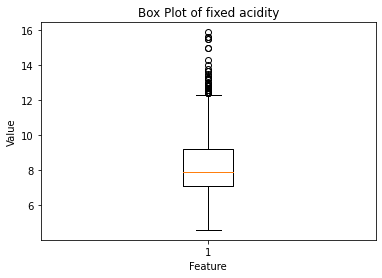

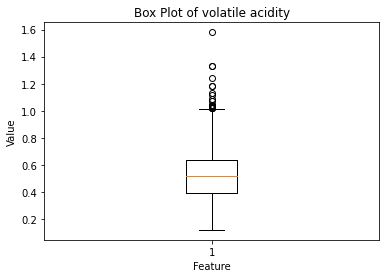

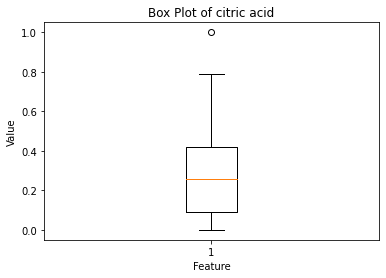

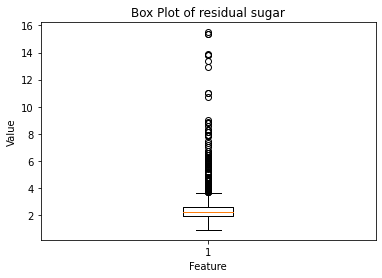

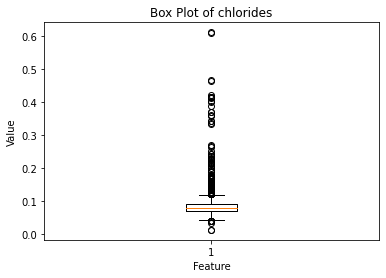

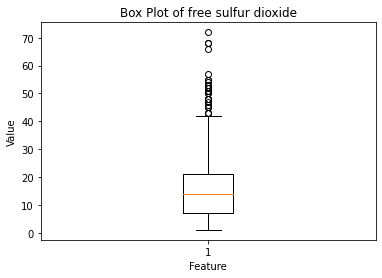

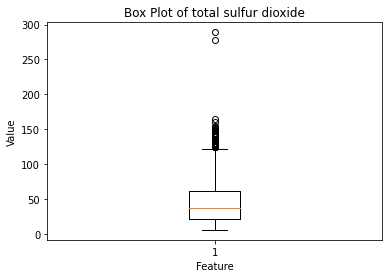

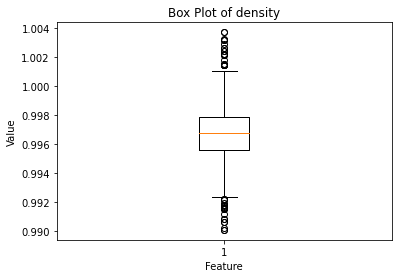

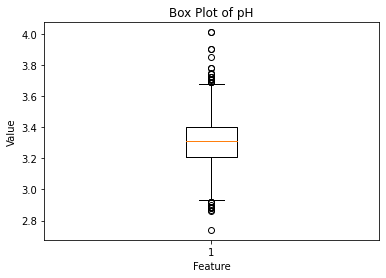

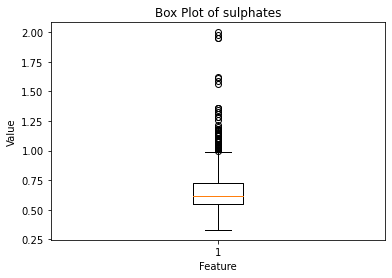

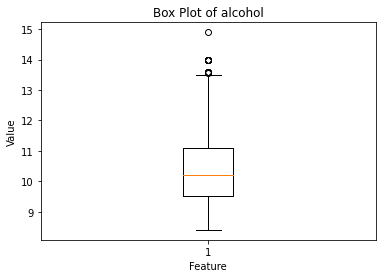

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Loop through each feature in the dataset
for feature in df.columns[:-1]: # exclude the class_label column
    # Create a box plot for the current feature
    fig, ax = plt.subplots()
    ax.boxplot(df[feature])

    # Set the title and axis labels for the plot
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Value')

    # Display the plot
    plt.show()


# Feature scaling

# Feature selection
## variance Threshold
## feature forward selection,
## Information Gain (IG)

In [ ]:

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import pandas as pd


#using Feature selection using variance
# Instantiate a variance threshold selector
selector = VarianceThreshold(threshold=0.1)

# Apply the selector to the dataset
X_selected = selector.fit_transform(df.iloc[:, :-1])

# Print the selected features
selected_features = df.columns[:-1][selector.get_support()]
print(f'Selected features by threshold varience: {selected_features}')


#Feature Forward Selection
# Split the dataset into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Instantiate a linear regression model
model = LinearRegression()

# Instantiate a sequential feature selector
selector = SequentialFeatureSelector(model, n_features_to_select=3)

# Apply the selector to the dataset
X_selected = selector.fit_transform(X, y)

# Print the selected features
selected_features = X.columns[selector.get_support()]
print(f'Selected features by Feature forward selection: {selected_features}')

#Information Gain (IG)
# Split the dataset into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Instantiate a mutual information selector
selector = SelectKBest(mutual_info_classif, k=3)

# Apply the selector to the dataset
X_selected = selector.fit_transform(X, y)

# Print the selected features
selected_features = X.columns[selector.get_support()]
print(f'Selected features by information gain: {selected_features}')


Selected features by threshold varience: Index(['fixed acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')
Selected features by Feature forward selection: Index(['volatile acidity', 'pH', 'alcohol'], dtype='object')
Selected features by information gain: Index(['volatile acidity', 'sulphates', 'alcohol'], dtype='object')


# Principle Component Analysis
## (PCA).


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd


# Split the dataset into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Instantiate a PCA object with two components
pca = PCA(n_components=2)

# Fit the PCA model to the dataset
X_pca = pca.fit_transform(X)

# Print the explained variance ratio
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

# Create a new DataFrame with the PCA components and target
df_pca = pd.DataFrame({'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'class_label': y})

# Print the first few rows of the new DataFrame
print(df_pca.head())


Explained variance ratio: [0.94657698 0.0483683 ]
        PCA1      PCA2  class_label
0 -13.224905 -2.023900            5
1  22.037724  4.408322            5
2   7.162673 -2.501461            5
3  13.430063 -1.951122            6
4 -13.224905 -2.023900            5


# Perform Classification task with feature selection by Information Gain using classifiers Naive Bayes.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB




# Split the data into features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate information gain for feature selection
ig = mutual_info_classif(X_train, y_train)

# Get the indices of the top 5 features with the highest information gain
top_features = np.argsort(ig)[-5:]

# Select the top features for training and testing data
X_train_fs = X_train.iloc[:, top_features]
X_test_fs = X_test.iloc[:, top_features]

# Train a Naive Bayes classifier using the selected features
clf = GaussianNB()
clf.fit(X_train_fs, y_train)

# Evaluate the model on the testing data
y_pred = clf.predict(X_test_fs)




# evaluation of model using metrics (Precision, Recall, F1 Score) in a tabular form, with Information Gain and Without Information Gain

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('Evaluation Metrics:')
print('-------------------')
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 Score: {:.3f}'.format(f1))

# Train a Naive Bayes classifier using all features
clf_all = GaussianNB()
clf_all.fit(X_train, y_train)

# Evaluate the model on the testing data with all features
y_pred_all = clf_all.predict(X_test)

# Calculate precision, recall, and F1 score
precision_all = precision_score(y_test, y_pred_all, average='weighted')
recall_all = recall_score(y_test, y_pred_all, average='weighted')
f1_all = f1_score(y_test, y_pred_all, average='weighted')

# Print the evaluation metrics for all features
print('\nEvaluation Metrics for all features:')
print('------------------------------------')
print('Precision: {:.3f}'.format(precision_all))
print('Recall: {:.3f}'.format(recall_all))
print('F1 Score: {:.3f}'.format(f1_all))

# Create a table with the results
results = pd.DataFrame({
    'Feature Selection Method': ['Information Gain', 'All Features'],
    'Precision': [precision, precision_all],
    'Recall': [recall, recall_all],
    'F1 Score': [f1, f1_all]
})

# Print the table
print('\nResults:')
print('--------')
print(results.to_string(index=False))

Evaluation Metrics:
-------------------
Precision: 0.516
Recall: 0.548
F1 Score: 0.528

Evaluation Metrics for all features:
------------------------------------
Precision: 0.547
Recall: 0.542
F1 Score: 0.543

Results:
--------
Feature Selection Method  Precision   Recall  F1 Score
        Information Gain   0.515537 0.547917  0.527738
            All Features   0.547096 0.541667  0.543265


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Perform Classification task using classifiers naive bayes from scratch without using the respective Python library functions with Feature reduction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score


X = df.drop(['quality'], axis=1)
y = df['quality']
X = (X - X.mean()) / X.std() # Normalize the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Naive Bayes function
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = np.zeros((len(self.classes), X.shape[1]))
        self.var = np.zeros((len(self.classes), X.shape[1]))
        self.prior = np.zeros(len(self.classes))
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[i] = X_c.mean(axis=0)
            self.var[i] = X_c.var(axis=0)
            self.prior[i] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            posteriors = []
            for j, c in enumerate(self.classes):
                prior = np.log(self.prior[j])
                likelihood = np.sum(np.log(self.gaussian_pdf(x, self.mean[j], self.var[j])))
                posterior = prior + likelihood
                posteriors.append(posterior)
            y_pred[i] = self.classes[np.argmax(posteriors)]
        return y_pred

    def gaussian_pdf(self, x, mean, var):
        eps = 1e-4
        coeff = 1.0 / (np.sqrt(2.0 * np.pi * var) + eps)
        exponent = np.exp(-(np.power(x - mean, 2) / (2 * var + eps)))
        return coeff * exponent

# Train the Naive Bayes classifier
nb = NaiveBayes()
nb.fit(X_train.values, y_train.values)

# Evaluate the Naive Bayes classifier
y_pred = nb.predict(X_test.values)

# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Print the results in a tabular form
df_results = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1 Score': f1}, index=nb.classes)
print(df_results)


   Precision    Recall  F1 Score
3   0.000000  0.000000  0.000000
4   0.285714  0.200000  0.235294
5   0.651515  0.661538  0.656489
6   0.520000  0.492424  0.505837
7   0.415094  0.523810  0.463158
8   0.000000  0.000000  0.000000
